# เฉลยการบ้าน ให้เด็กๆไปหัดวาดกราฟด้วย PyPlot

เราวาดกราฟของฟังก์ชั่นต่างๆเพื่อทำความเข้าใจว่ามันมีหน้าตาอย่างไร มีค่าเท่าไรบ้าง ตัดแกนที่ไหนบ้าง มีส่วนที่ไปอินฟินิตี้ไหม ฯลฯ

ในหลายๆกรณีเราต้องการหาค่า $x$ ที่ทำให้ $f(x)$ มีค่าเท่ากับศูนย์ เราก็จะวาดกราฟของ $y = f(x)$ แล้วดูว่ากราฟตัดแกน $x$ ที่ไหนบ้าง ถ้ารู้ค่าโดยประมาณก็เอาค่าประมาณไปหาค่าถูกต้องมากขึ้นด้วยวิธีต่างๆเช่น bisection ที่เราเคยใช้กันมา

ก่อนอื่นเราก๊อปปี้วิธี bisection มาก่อนเผื่อต้องใช้:

In [1]:
def bisection4(f,xmin, xmax):
    "พยายามหาค่า x ที่ทำให้ f(x)==0, xmin และ xmax คือช่วงที่เดาว่าคำตอบอยู่ในนั้น"
    
    tolerance = 1e-6  #ตั้งค่า tolerance ไว้ให้หยุดทำงาน
                      #จะหยุดทำงานเมื่อ xmin ห่างจาก xmax น้อยกว่า tolerance
    
    if xmin > xmax:   # จัดการให้ xmin น้อยกว่า xmax เสมอ
        xmin, xmax = xmax, xmin
    
    if f(xmin)*f(xmax) > 0:
        print("Bad xmin, xmax") #ถ้าฟังก์ชั่น f ไม่เปลี่ยนเครื่องหมายจากบวกไปลบหรือลบไปบวก
                              #ระหว่าง xmin และ xmax ก็ควรไปเดาใหม่ว่า xmin, xmax คืออะไร
        return None
    
    
    while xmax-xmin > tolerance: # ทำตรงนี้วนๆไปตราบใดท่ี xmin และ xmax ยังห่างกันกว่า tolerance
        
        #print(f"xmin, xmax = {xmin}, {xmax}\t f(xmin)*f(xmax) = {f(xmin)*f(xmax):.5f}")
        
        if f(xmin) == 0:
            return xmin
        
        if f(xmax) == 0:
            return xmax

        xmid = (xmin + xmax)/2    #หาจุดกลางระหว่าง xmin และ xmax
        if f(xmin)*f(xmid) < 0:   #ถ้าฟังก์ชั่นเปลี่ยนเครื่องหมายระหว่าง xmin กับจุดกลาง ก็ไปหาต่อในช่วงนี้
            xmin, xmax = xmin, xmid
        else:                     #ไม่งั้นก็หาต่อในช่วงจุดกลางถึง xmax
            xmin, xmax = xmid, xmax
            
    slope = (f(xmax)-f(xmin))/(xmax-xmin) 
    x = xmin + (0-f(xmin))/slope  # คำตอบที่ได้จะเทียบบัญญัติไตรยางค์ระหว่างจุด (xmin, f(xmin)) และ จุด (xmax, f(xmax))
    
    return x

solve = bisection4

ก่อนจะวาดกราฟด้วย PyPlot ให้พิมพ์สองบรรทัดนี้เตรียมไว้ก่อน

บรรทัดแรกบอกให้วาดกราฟต่างๆใน Jupyter Notebook 

บรรทัดที่สองบอกว่าไปดึงความสามารถวาดกราฟมาจาก matplotlib.pyplot แล้วตั้งชื่อมันเพื่อให้เรียกง่ายๆว่า plt

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

เริ่มวาดได้เลย สร้างลิสต์ที่มีค่า x ที่ต้องการด้วย list comprehension

สร้างฟังก์ชั่น f(x) ที่ต้องการวาด

สร้างลิสต์ y ที่แต่ละตัวมีค่าเท่ากับ f ของค่า x แต่ละตัว

อันนี้วาด $y= f(x) = x^2- 2 x + 5$

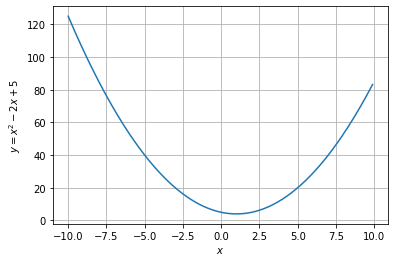

In [3]:
x = [0.1*k for k in range(-100,100)]
def f(x):
    return x**2 - 2*x + 5
y = [f(k) for k in x]

plt.plot(x, y)
plt.ylabel(r'$y=x^2- 2 x + 5$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.show()

อันนี้วาด $y= f(x) = -x^2 + 3 x + 1$

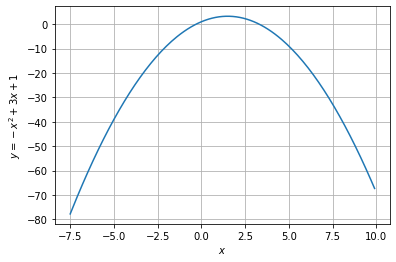

In [4]:
x = [0.1*k for k in range(-75,100)]
def f(x):
    return -x**2 + 3*x + 1
y = [f(k) for k in x]

plt.plot(x, y)
plt.ylabel(r'$y=-x^2 + 3 x + 1$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.show()

อันนี้วาด $y= f(x) = -x^2 - 2x + 5$

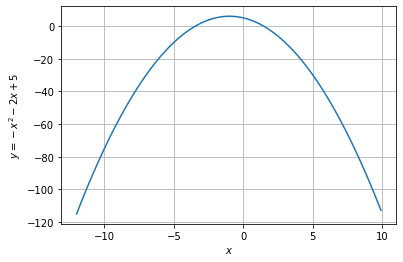

In [5]:
x = [0.1*k for k in range(-120,100)]
def f(x):
    return -x**2 - 2*x + 5
y = [f(k) for k in x]

plt.plot(x, y)
plt.ylabel(r'$y=-x^2 - 2x + 5$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.show()

อันนี้วาด $y= f(x) = -x^5 + 4 x^4 - 3x^3 - 2x + 1$

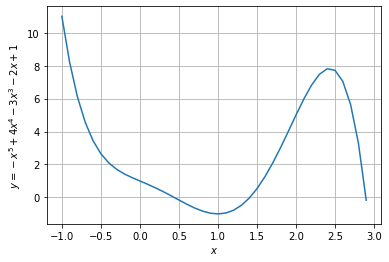

In [6]:
x = [0.1*k for k in range(-10,30)]
def f(x):
    return -x**5 + 4*x**4 - 3*x**3 - 2*x + 1
y = [f(k) for k in x]

plt.plot(x, y)
plt.ylabel(r'$y=-x^5 + 4 x^4 - 3x^3 - 2x + 1$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.show()

จากกราฟ  $y= f(x) = -x^5 + 4 x^4 - 3x^3 - 2x + 1$ ข้างบน เราเห็นว่ากราฟตัดแกน $x$ แถวๆ 0.5, 1.5, และ 3 

เราสามารถใช้วิธี bisection มาหาค่า $x$ ที่ทำให้ $f(x)=0$ ได้ดังนี้: 

In [7]:
# เดาค่า x ระหว่าง 0 ถึง 0.5
solve(f, 0, 0.5)

0.43917412879384804

In [8]:
# เดาค่า x ระหว่าง 1 ถึง 1.5
solve(f, 1, 1.5)

1.4085692480206498

In [9]:
# เดาค่า x ระหว่าง 2.5 ถึง 3
solve(f, 2.5, 3)

2.8959321526434905

อันนี้วาด $y= f(x) = y=x^2 + 3x + 1 -\frac{1}{x}$

เนื่องจากมี $\frac{1}{x}$ เราต้องระวังไม่ใส่ค่า x เป็นศูนย์เข้าไป 

เราจึงสร้างลิสต์ของค่า x โดยใส่ +0.05 เข้าไปใน x = [0.1*k + 0.05 for k in range(-120,100)] เพื่อให้ค่า $x$ คร่อม 0 ไว้

เส้นตั้งฉากแถวๆ $x=0$ นั้นไม่มีจริงๆ เพียงแต่ PyPlot ลากเส้นเชื่อมโยงจุด $x=-0.05$ และ $x=0.05$ ให้

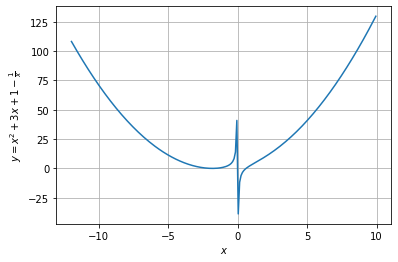

In [10]:
x = [0.1*k + 0.05 for k in range(-120,100)]
def f(x):
    return x**2 + 3*x + 1 - 2/x
y = [f(k) for k in x]

plt.plot(x, y)
plt.ylabel(r'$y=x^2 + 3x + 1 -\frac{1}{x}$')
plt.xlabel(r'$x$')
plt.grid(True)
plt.show()

# เล่นแก้โจทย์ที่แทนเลขโดดด้วยตัวอักษร

สืบเนื่องจากกระทู้พันทิพเรื่องการบ้านเด็กป.4 https://pantip.com/topic/39141834 ที่ถามว่าถ้า A-H เป็นตัวเลขโดดๆไม่ซ้ำกันและ AFBF + CGHB + DAFG +AEAB = BCDC ให้หาค่าว่า A-H มีค่าอะไรบ้าง ถ้าเราไม่อยากคิดด้วยสมองเราเองเราก็อาจสั่งให้คอมพิวเตอร์ไปนั่งไล่ค่าที่เป็นไปได้ของ A,B,C,...,H ดูว่าค่าแบบไหนทำให้สมการเป็นจริงบ้าง

วันนี้เด็กๆทดลองใช้ list comprehension แก้ปัญหาตระกูลนี้กัน และให้การบ้านไปตั้งโจทย์ตระกูลนี้มาถามคนอื่นๆดูกันครับ

ไอเดียก็คือแทนค่าตัวอักษรแต่ละตัวด้วยตัวเลขที่เป็นไปได้แล้วตรวจดูว่าสมการเป็นจริงไหม ถ้าจริงก็แสดงผลออกมา


In [11]:
# โจทย์: AA + BB = 1B3
d = range(0,10)
[(A, B) for A in d for B in d if 10*A+A + 10*B+B == 100+10*B+3]

[(9, 4)]

In [12]:
# ตรวจคำตอบว่า 99 + 44 เท่ากับ 143 ไหม
99 + 44 == 143

True

In [13]:
# โจทย์: 3AB + BAB = 12BA
# อันนี้ไม่พบคำตอบ

d = range(0,10)
[(A, B) for A in d for B in d if 300+10*A+B + 100*B+10*A+B == 1200+10*B+A]

[]

In [14]:
# AB + BA = 1A7
d = range(0,10)
[(A, B) for A in d for B in d if 10*A+B + 10*B+A == 100+10*A+7]

[(8, 9)]

In [15]:
# ตรวจคำตอบว่า 89 + 98 เท่ากับ 187 ไหม
89 + 98 == 187

True

In [16]:
# 1AB * BA1 = 1A540B
d = range(0,10)
[(A, B) for A in d for B in d if (100+10*A+B)*(100*B+10*A+1) == 100_000 + 10_000*A +5000+400+B]

[(8, 9)]

In [17]:
# ตรวจคำตอบว่า 189 * 981 เท่ากับ 185,409 ไหม
189 * 981 == 185409

True

บางครั้งเราอาจต้องการว่าตัวอักษร A,B,C,D... แทนค่าตัวเลขที่ไม่ซ้ำกันเลย วิธีไล่ดูตัวเลขของเราจะให้คำตอบที่มีตัวเลขซ้ำกันด้วย วิธีหนึ่งที่เราใช้กรองเฉพาะคำตอบที่ตัวอักษรแต่ละตัวแทนค่าตัวเลขที่ไม่ซ้ำกันเลยคือใช้คุณสมบัติของ set อ่านเกี่ยวกับ set ได้ที่ [Sets in Python](https://realpython.com/python-sets/) หรือที่ [ภาษา python เบื้องต้น บทที่ ๑๓: เซ็ต](https://phyblas.hinaboshi.com/tsuchinoko13) 

ถ้าเรามีลิสต์ที่มีสมาชิกที่อาจซ้ำอยู่ เราเอามาตรวจสอบได้โดยเปลี่ยนลิสต์เป็นเซ็ท แล้วดูว่าจำนวนสมาชิกของเซ็ทเท่ากับจำนวนสมาชิกของลิสต์ตั้งต้นหรือไม่ ถ้าเท่ากันก็แสดงว่าสมาชิกในลิสต์ตั้งต้นไม่ซ้ำกันเพราะเซ็ทจะเก็บสมาชิกไว้แบบไม่ซ้ำกัน

In [18]:
# สมมุติว่ามีลิสต์ที่มีสมาชิกซ้ำกันอยู่ เมื่อนับจำนวนสมาชิกด้วย len() จะได้สมาชิก 5 ตัว
x = [3,5,6,5,8]
len(x)

5

In [19]:
# เอาลิสต์ x มาทำให้เป็นเซ็ท จะเห็นว่าจะเก็บสมาชิกไว้แบบไม่ให้ซ้ำกัน
set(x)

{3, 5, 6, 8}

In [20]:
# ตรวจสอบว่าสมาชิกของเซ็ทเท่ากับของลิสต์ไหม ในที่นี้ลิสต์มีสมาชิกซ้ำ จำนวนสมาชิกเซ็ทจึงไม่เท่ากับของลิสต์
len(set(x)) == len(x)

False

In [21]:
# กรณีนี้ไม่มีสมาชิกซ้ำ จำนวนสมาชิกเซ็ทจึงเท่ากับในลิสต์
x = [1,2,3,100,300,1000]
len(set(x)) == len(x)

True

ทดลองแก้โจทย์ต่อ โดยคราวนี้ตรวจด้วยว่าอักษร A, B, C,... แทนตัวเลขไม่ซ้ำกัน โดยเราใส่เงื่อนไขเข้าไปตรวจสอบแบบ len(set((A,B,C,D)))==len((A,B,C,D))

In [22]:
#'CAC' + 'DBA' = 'DABC'
d = range(0,10)
[(A, B, C, D) for A in d for B in d\
 for C in d for D in d if 100*C+10*A+C + 100*D+10*B+A == 1000*D+100*A+10*B+C\
and len(set((A,B,C,D)))==len((A,B,C,D))]

[(0, 2, 9, 1),
 (0, 3, 9, 1),
 (0, 4, 9, 1),
 (0, 5, 9, 1),
 (0, 6, 9, 1),
 (0, 7, 9, 1),
 (0, 8, 9, 1)]

In [23]:
# 'BAB' * 'BCD' = 'CADDBB'
# 828 871 721188
d = range(0,10)
[(A, B, C, D) for A in d for B in d\
 for C in d for D in d if (100*B+10*A+B) * (100*B+10*C+D) == 100_000*C+10_000*A+1_100*D+11*B\
and len(set((A,B,C,D)))==len((A,B,C,D))]

[(2, 8, 7, 1)]

In [24]:
#'CA' * 'BD' = 'ACBD'
# 41 35 1435
d = range(0,10)
[(A, B, C, D) for A in d for B in d\
 for C in d for D in d if (10*C+A) * (10*B+D) == 1000*A+100*C+10*B+D\
and len(set((A,B,C,D)))==len((A,B,C,D))]


[(1, 3, 4, 5), (1, 3, 5, 0), (1, 6, 2, 0)]

In [25]:
#('BAA', 'CAC', 'BAAC'): ['100+909=1009']
d = range(0,10)
[(A, B, C) for A in d for B in d\
 for C in d  if (100*B+10*A+A) + (100*C+10*A+C) == 1000*B+100*A+10*A+C\
and len(set((A,B,C)))==len((A,B,C))]

[(0, 1, 9)]

In [26]:
#CCA - BA = CBA ['220 - 10 = 230', '440 - 20 = 460', '660 - 30 = 690', '880 - 40 = 920']
d = range(0,10)
[(A, B, C) for A in d for B in d\
 for C in d  if (100*C+10*C+A) - (100*0+10*B+A) == 100*C+10*B+A\
and len(set((A,B,C)))==len((A,B,C))]

[(0, 1, 2), (0, 2, 4), (0, 3, 6), (0, 4, 8)]

In [27]:
#CBAD / C = BACD: ['3105 / 3 = 1035']
d = range(0,10)
[(A, B, C, D) for A in d for B in d\
 for C in range(1,10) for D in d if (C*1000+B*100+A*10+D) / C == 1000*B+100*A+10*C+D\
and len(set((A,B,C,D)))==len((A,B,C,D))]

[(0, 1, 3, 5)]